YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1061.
Date:                Sat, 01 Mar 2025   Prob (F-statistic):          7.53e-229
Time:                        20:51:27   Log-Likelihood:                -1832.6
No. Observations:                 557   AIC:                             3673.
Df Residuals:                     553   BIC:                             3691.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -18.0396      2.973     -6.

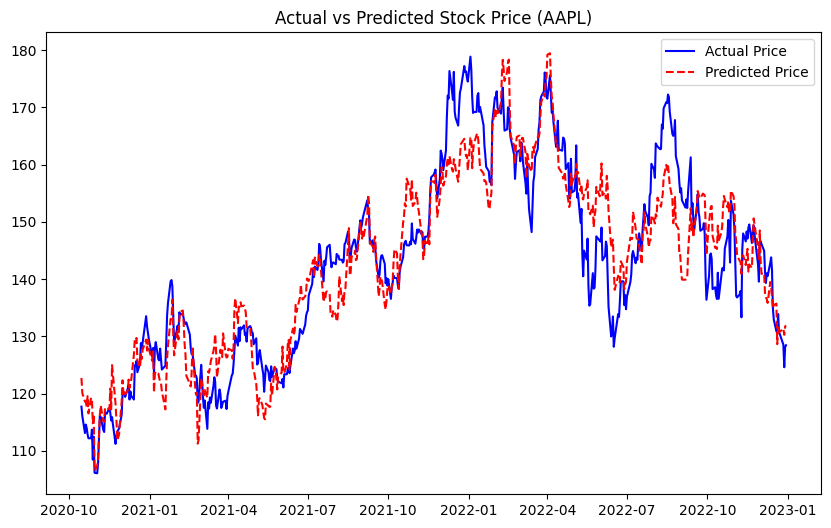

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Step 1: Fetch stock data for Apple (AAPL)
stock = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Step 2: Calculate technical indicators
# 50-day and 200-day Moving Averages
stock['50_MA'] = stock['Close'].rolling(window=50).mean()
stock['200_MA'] = stock['Close'].rolling(window=200).mean()

# Calculate the daily price change (delta)
delta = stock['Close'].diff()

# Calculate gain and loss for RSI
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

# Calculate the Relative Strength (RS)
rs = gain / loss

# Calculate RSI (Relative Strength Index)
stock['RSI'] = 100 - (100 / (1 + rs))

# Step 3: Drop missing values (due to moving averages and RSI calculations)
stock = stock.dropna()

# Step 4: Define independent variables (technical indicators) and dependent variable (Adj Close)
X = stock[['50_MA', '200_MA', 'RSI']]  # Independent variables
y = stock['Close']  # Dependent variable (target variable)

# Add constant to the independent variables for the intercept
X = sm.add_constant(X)

# Step 5: Perform the multivariate regression
model = sm.OLS(y, X).fit()

# Step 6: Show the regression results
print(model.summary())

# Step 7: Predict stock prices based on the model
stock['Predicted_Price'] = model.predict(X)

# Step 8: Plot the actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stock['Close'], label='Actual Price', color='blue')
plt.plot(stock['Predicted_Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Price (AAPL)')
plt.legend()
plt.show()
